In [1]:
%matplotlib inline

import numpy as np
import pickle
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn import manifold
import time
import itertools
import os
import community as cm
import networkx as nx
from scipy.optimize import curve_fit
from natsort import natsorted
from sklearn import cluster

In [2]:
def relative_stability(Fs, Gs):
    stabs = []
    for i in range(len(Fs) - 1):
        j1 = np.matrix(Fs[i])
        j2 = np.matrix(Fs[i+1])
                
        j2 = j2[:j1.shape[0], :]
                
        a1 = nx.to_numpy_matrix(Gs[i])
        a2 = nx.to_numpy_matrix(Gs[i+1])[:a1.shape[0], :a1.shape[0]]
        
        t1 = np.linalg.norm(j2 - j1, 'fro')
        t1 /= np.linalg.norm(j1, 'fro')
        t2 = np.linalg.norm(a2 - a1, 'fro')
        t2 /= np.linalg.norm(a1, 'fro')
        
        stabs.append(t1 / t2)
        
    absolutes = [abs(x) for x in stabs]
#     return stabs, max(absolutes) - min(absolutes)
    return stabs, np.average(stabs)

def relative_stability(Fs, Gs):
    stabs = []
    for i in range(len(Fs) - 1):
        j1 = np.matrix(Fs[i])
        j2 = np.matrix(Fs[i+1])
                
        j2 = j2[:j1.shape[0], :]
                
        a1 = nx.to_numpy_matrix(Gs[i])
        a2 = nx.to_numpy_matrix(Gs[i+1])[:a1.shape[0], :a1.shape[0]]
        
        t1 = np.linalg.norm(j2 - j1, 'fro')
#         t1 /= np.linalg.norm(j1, 'fro')
        t2 = np.linalg.norm(a2 - a1, 'fro')
#         t2 /= np.linalg.norm(a1, 'fro')
        
        stabs.append(t1 / t2)
        
    absolutes = [abs(x) for x in stabs]
#     return stabs, max(absolutes) - min(absolutes)
    return stabs, np.average(stabs)

In [20]:
nets = [nx.read_graphml('smallworld/time_graphs/0/' + str(2500 + i * 10) + '.graphml') for i in range(10)]

In [21]:
d1s = []

for i in range(1, 26):

    (t1, _, _) = pickle.load(open('walkruns/' + str(i) + '.pkl', 'rb'))
    d1s.append(np.average([t1[t+1] - t1[t] for t in range(len(t1) - 1)]))

d2s = []
for f in natsorted(os.listdir('DynamicGEM-master/dynruns/')):

    (t1, _) = pickle.load(open('DynamicGEM-master/dynruns/' + f, 'rb'))
    d2s.append(np.average([t1[t+1] - t1[t] for t in range(len(t1) - 1)]))

comps = []
for d in d1s:
    dists = [np.abs(a - d) for a in d2s]
    closest = dists.index(min(dists))
#     comps.append(closest)
    comps.append(natsorted(os.listdir('DynamicGEM-master/dynruns/'))[closest])

In [22]:
files = natsorted(os.listdir('DynamicGEM-master/dynruns/'))
dyns = []

# for i in range(len(files) - 1):
for i in tqdm_notebook(comps):
    
    (_, t) = pickle.load(open('DynamicGEM-master/dynruns/' + i, 'rb'))
    
    frobs = relative_stability(t, nets)
        
    dyns.append(frobs[1])



In [23]:
files = natsorted(os.listdir('walkruns/'))

walks = []

for i in tqdm_notebook(range(len(files))):
    
    (_, t, _) = pickle.load(open('walkruns/' + files[i], 'rb'))
    
    frobs = []
    
    frobs = relative_stability(t, nets)
        
    walks.append(frobs[1])



In [24]:
for i in range(len(walks)):
    print('{:03d} {:03d} {:.5f} {:.5f}'.format(i + 1, int(comps[i][:-4]), walks[i], dyns[i]))

001 001 2.85583 2.00429
002 009 2.81684 6.66086
003 018 2.80367 20.67973
004 025 2.89664 27.94330
005 035 3.00394 32.41145
006 036 3.24783 33.32802
007 046 2.69582 41.45247
008 051 3.44661 48.37501
009 060 3.65257 56.33287
010 075 3.49583 60.40742
011 085 3.89120 56.81872
012 090 2.87088 57.16433
013 100 4.05495 63.12670
014 110 3.83878 58.16318
015 115 4.35454 61.36024
016 120 4.23255 57.91123
017 150 3.66358 61.75410
018 150 4.67756 61.75410
019 150 5.14744 61.75410
020 175 3.58570 61.34391
021 175 3.86193 61.34391
022 175 4.00495 61.34391
023 175 3.79975 61.34391
024 200 4.25090 62.58552
025 200 4.42522 62.58552


In [19]:
relative_stability(pickle.load(open('walk_AS/15.pkl', 'rb'))[1], [nx.read_graphml("hepth/graphs/" + str(5*m) + ".graphml") for m in range(10)])

([0.7005948172205874,
  0.5980503869518543,
  0.5318534648408413,
  0.5593390515145943,
  0.5265829767849693,
  0.5622079425771058,
  0.5389078846546018,
  0.5210415690077949,
  0.49871611609338007],
 0.5596993566273033)

In [57]:
relative_stability(pickle.load(open('walkruns/15.pkl', 'rb'))[1], [nx.read_graphml('smallworld/time_graphs/0/' + str(2500 + i * 10) + '.graphml') for i in range(10)])

([5.528404553124908,
  3.786490351138618,
  4.708454879395332,
  4.798611657737502,
  4.2227385117419995,
  3.8746821984103192,
  4.125266366147289,
  4.285680961572408,
  3.860557508101947],
 4.354542998596703)

In [21]:
relative_stability(pickle.load(open('DynamicGEM-master/dynAS/100.pkl', 'rb'))[1], [nx.read_graphml("hepth/graphs/" + str(5*m) + ".graphml") for m in range(10)])

([3.1758387871033746,
  3.1184947513661765,
  2.484513416304579,
  2.7156379150618544,
  2.682019721998298,
  1.7417028919089208,
  3.0368925180734108,
  2.938043428828487,
  2.247810946716104],
 2.6823282641512454)

In [22]:
relative_stability(pickle.load(open('DynamicGEM-master/dynruns/100.pkl', 'rb'))[1], [nx.read_graphml('smallworld/time_graphs/0/' + str(2500 + i * 10) + '.graphml') for i in range(10)])

([61.30401537407677,
  48.14854821223269,
  66.51416881436664,
  61.4249718954782,
  56.22299189975795,
  55.670611478807125,
  56.96258070855326,
  61.64232818981958,
  58.87245938243705],
 58.52918621728102)

In [23]:
relative_stability(pickle.load(open('hepth/AS_node2vec.pkl', 'rb')), [nx.read_graphml("hepth/graphs/" + str(5*m) + ".graphml") for m in range(10)])

([4.068832600341087,
  4.218527151271345,
  3.9173330989850794,
  3.9994623424769906,
  3.957556108773782,
  4.165228036376949,
  4.027961378811749,
  3.9717920598969925,
  3.783626472976652],
 4.012257694434514)

In [24]:
relative_stability(pickle.load(open('hepth/runs_node2vec.pkl', 'rb')), [nx.read_graphml('smallworld/time_graphs/0/' + str(2500 + i * 10) + '.graphml') for i in range(10)])

([21.92909329297634,
  18.42953536092099,
  22.645881547326837,
  21.65560388219202,
  19.36709170489797,
  19.460462767474073,
  20.08918844037449,
  21.855877889950246,
  19.252553809347177],
 20.520587632828903)

In [3]:
def relative_stability2(Fs, Gs):
    stabs = []
    for i in range(len(Fs) - 1):
        j1 = np.matrix(Fs[i])
        j2 = np.matrix(Fs[i+1])
                
        j2 = j2[:j1.shape[0], :]
                
        a1 = nx.to_numpy_matrix(Gs[i])
        a2 = nx.to_numpy_matrix(Gs[i+1])[:a1.shape[0], :a1.shape[0]]
        
        t1 = np.linalg.norm(j2 - j1, 'fro')
#         t1 /= np.linalg.norm(j1, 'fro')
        t2 = np.linalg.norm(a2 - a1, 'fro')
#         t2 /= np.linalg.norm(a1, 'fro')
        
        stabs.append((t1, t2))
        
    return stabs

In [57]:
cur = 1000

evals = [cur]

while evals[-1] < 1450:
#     rand = np.random.rand()
#     if rand < 0.025:
#         cur += 100
#     elif rand < 0.1:
#         cur += 25
#     else:
#         cur += 1
    rand = int(np.random.beta(0.1, 3) * 100) + 1
    cur = cur + rand
    evals.append(cur)
    
print(len(evals))

print(evals)

99
[1000, 1001, 1002, 1003, 1018, 1051, 1052, 1053, 1054, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1153, 1156, 1157, 1158, 1160, 1161, 1162, 1163, 1164, 1171, 1235, 1236, 1237, 1269, 1270, 1278, 1279, 1295, 1296, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1314, 1315, 1318, 1319, 1320, 1322, 1327, 1328, 1329, 1330, 1346, 1347, 1348, 1349, 1354, 1355, 1356, 1358, 1396, 1397, 1398, 1402, 1403, 1405, 1406, 1419, 1420, 1421, 1440, 1441, 1442, 1443, 1444, 1447, 1449, 1450]


[0.12503727]


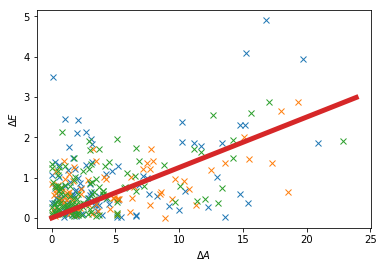

<Figure size 432x288 with 0 Axes>

In [4]:
all_1s = []
all_2s = []

evals = [1000, 1001, 1002, 1003, 1018, 1051, 1052, 1053, 1054, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1153, 1156, 1157, 1158, 1160, 1161, 1162, 1163, 1164, 1171, 1235, 1236, 1237, 1269, 1270, 1278, 1279, 1295, 1296, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1314, 1315, 1318, 1319, 1320, 1322, 1327, 1328, 1329, 1330, 1346, 1347, 1348, 1349, 1354, 1355, 1356, 1358, 1396, 1397, 1398, 1402, 1403, 1405, 1406, 1419, 1420, 1421, 1440, 1441, 1442, 1443, 1444, 1447, 1449, 1450]

bleghs = relative_stability2(pickle.load(open('anom10.pkl', 'rb'))[1], [nx.read_graphml('runs/graphs/m' + str(i)  + '.graphml') for i in evals])

ones = [b[0] for b in bleghs][1:]
ones = [np.abs(ones[i] - ones[i+1]) for i in range(len(ones) - 1)]

twos = [b[1] for b in bleghs][1:]
twos = [np.abs(twos[i] - twos[i+1]) for i in range(len(twos) - 1)]

all_1s += ones
all_2s += twos

plt.xlabel('$\Delta A$')
plt.ylabel('$\Delta E$')

plt.plot(twos, ones, 'x')

evals = [1000, 1001, 1002, 1006, 1007, 1011, 1012, 1013, 1045, 1046, 1047, 1060, 1072, 1073, 1077, 1079, 1080, 1081, 1082, 1083, 1093, 1097, 1100, 1101, 1102, 1115, 1116, 1117, 1119, 1120, 1122, 1139, 1145, 1147, 1148, 1209, 1215, 1216, 1217, 1231, 1275, 1276, 1277, 1278, 1279, 1280, 1283, 1284, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1320, 1321, 1335, 1336, 1337, 1338, 1339, 1340, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1408, 1409, 1410, 1417, 1418, 1419, 1420, 1421, 1424, 1452]

bleghs = relative_stability2(pickle.load(open('anom102.pkl', 'rb'))[1], [nx.read_graphml('runs/graphs/m' + str(i)  + '.graphml') for i in evals])

ones = [b[0] for b in bleghs][1:]
ones = [np.abs(ones[i] - ones[i+1]) for i in range(len(ones) - 1)]

twos = [b[1] for b in bleghs][1:]
twos = [np.abs(twos[i] - twos[i+1]) for i in range(len(twos) - 1)]

all_1s += ones
all_2s += twos

plt.plot(twos, ones, 'x')

evals = [1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1063, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1104, 1105, 1106, 1107, 1112, 1113, 1114, 1116, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1182, 1194, 1195, 1197, 1198, 1199, 1200, 1212, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1245, 1249, 1250, 1251, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1266, 1267, 1268, 1269, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1323, 1330, 1331, 1332, 1334, 1335, 1336, 1337, 1338, 1339, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1364, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1439, 1461]

bleghs = relative_stability2(pickle.load(open('anom103.pkl', 'rb'))[1], [nx.read_graphml('runs/graphs/m' + str(i)  + '.graphml') for i in evals])

ones = [b[0] for b in bleghs][1:]
ones = [np.abs(ones[i] - ones[i+1]) for i in range(len(ones) - 1)]

twos = [b[1] for b in bleghs][1:]
twos = [np.abs(twos[i] - twos[i+1]) for i in range(len(twos) - 1)]

all_1s += ones
all_2s += twos

plt.plot(twos, ones, 'x')

def hausdorff(lb, db):
    return db*lb

popt = curve_fit(hausdorff, all_2s, all_1s)[0]
print(popt)
db = popt[0]
xx = np.linspace(min(all_2s), max(all_2s) + 1, 100)
yy = [hausdorff(x, *popt) for x in xx]
plt.plot(xx, yy, lw=5)

plt.show()
plt.cla()
plt.clf()

[0.12503727]


0.0177982653641916

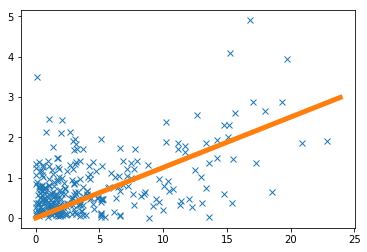

In [61]:
def hausdorff(lb, db):
    return db*lb

popt = curve_fit(hausdorff, all_2s, all_1s)[0]
print(popt)
db = popt[0]
plt.plot(all_2s, all_1s, 'x')
xx = np.linspace(min(all_2s), max(all_2s) + 1, 100)
yy = [hausdorff(x, *popt) for x in xx]
plt.plot(xx, yy, lw=5)